<a href="https://colab.research.google.com/github/Ahmedzedan0/Diabetes_prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Import Dependencies

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm # svm: Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## 2) Importing & Understanding Dataset 

In [35]:
# loading the dataset as Pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
diabetes_dataset.shape

(768, 9)

In [37]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
diabetes_dataset['Outcome'].value_counts()  # 0 means no diabetes & 1 means unfortunately diabetes

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## 3) Spliting the labels from the data 

In [40]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

## 4) Data Standrization

In [41]:
scaler = StandardScaler()   # Pro tip use control space for auto complete 
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [42]:
X = standardized_data
print(X)
print(80 * '_')
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
________________________________________________________________________________
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## 5) Spliting the data to Train & Test 

In [43]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## 6) training the Support Vector Machine 'SVM' Model

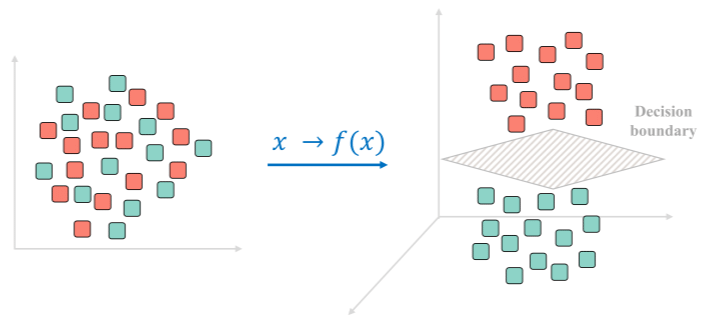

In [53]:
# Basically, the kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions
# in such a way that data points belonging to different classes are allocated to different dimensions

classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
                     tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1,
                     decision_function_shape='ovr', break_ties=False, random_state=None)  # SVC: Support Vector Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## 7) Model Evaluation Using Accuracy Score 

In [54]:
X_train_predicton = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicton, Y_train)
print(training_data_accuracy)

0.7866449511400652


In [55]:
X_test_predicton = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predicton, Y_test)
print(testing_data_accuracy)

0.7727272727272727


## 8) Make the Predection System

In [64]:
input_data = (5,116,74,0,0,25.6,0.201,30)
input_data_as_numpy_array = np.asanyarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# Standarize the input data
std_input_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_input_data)

if prediction== 0 :
  print('The person is not diabetic') 
else:
  print('The person is diabetec')                             

The person is not diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
